Plano de hoje
-------------

1. Ambiente de programação
2. Usando o computador para calcular    
3. Usando o computador para desenhar
4. Usando o computador para integrar: quadraturas
5. Usando o computador para aproximar: interpolação
    1. Interpolação local
    2. Interpolação de Lagrange
    3. Fenômeno de Runge e pontos de Chebyshev
    4. **Transformada de Fourier**

# Funções periódicas

Suponha que $f$ seja uma função peridódica, digamos de período $p = 2\pi$.
Poderíamos usar um polinômio restrito a um intervalo de comprimento $p$,
e reduzir $x$ a este intervalo para calcular as aproximações.

Mas seria muito trabalho, e além disso, pouco natural usar polinômios (que não são periódicos)
para interpolar funções periódicas.
Assim, em vez de combinar funções "que crescem muito",
vamos combinar funções periódicas para interpolar $f$.

## Senos e cossenos...

As funções periódicas mais simples (por várias razões) são senos e cossenos.
Por isso, podemos tentar uma interpolação da forma
$$ f(x) = \sum_k a_k \cos(kx) + b_k \sin(kx) $$

Lembrando da base de polinômios $\phi_i(x)$ da interpolação de Lagrange,
agora estamos usando uma base dada por senos e cossenos.
E o problema agora é achar $a_k$ e $b_k$ convenientes.

## ... e exponenciais!

Para simplificar os cálculos, vamos usar números complexos:
note que $e^{ikx} = \cos(kx) + i\sin(kx)$, e que $e^{-ikx} = \cos(kx) - i\sin(kx)$,
logo podemos transformar $a_k \cos(kx) + b_k \sin(kx)$ em $c_k e^{ikx} + c _ {-k} e^{-ikx}$
através das igualdades
$$\begin{align*}
a_k & = c_k + c _ {-k} & b_k & = i c_k - i c _ {-k} \\
a_k + \frac{b_k}{i} & = 2 c_k & a_k - \frac{b_k}{i} & = 2 c _ {-k}.
\end{align*} $$
Note que, se $f$ é real (ou seja, $f(x) \in \mathbf{R}$ se $x$ é real),
temos que $a_k$ e $b_k$ são reais, mas o mesmo não é verdade para os $c_k$:
o que é verdade é que, se $f$ é real, $c _ {-k} = \bar{c_k}$.

## Determinando $c_k$

Para obtermos $c_k$, temos que fixar o grau da interpolação,
ou seja, determinar quantos pares $(x_j, y_j = f(x_j))$ vamos usar.
Com estes, usaremos as igualdades
$$ y_j = f(x_j) = \sum_{k=-M}^M c_k e^{ikx_j} $$
para obter equações lineares nos $c_k$.
Assim, se quisermos interpolar em grau $M$, vamos precisar de 2M + 1 pontos.

Observe que, na prática, podemos calcular $f(0)$ e $f(2\pi)$,
mas a equação advinda de $f(2\pi)$ é totalmente redundante com a equação vinda de $f(0)$.

### $x_j$ igualmente espaçados

Se, no caso da interpolação polinomial, a escolha de $x_j$ igualmente espaçados era natural,
mas sujeita a erros por oscilação,
aqui, como estamos usando funções cuja amplitude de oscilação é a mesma no intervalo inteiro,
este não será um problema maior.

Além disso, de forma prática, é muito mais simples realizar medições periódicas,
principalmente quando se trata de fenômenos onde a variável $x$ corresponde efetivamente ao tempo.

Suponha então, que estamos no caso simples: precisamos de $2M + 1$ pontos de interpolação,
e para isso tomamos $2M + 2$ pontos igualmente espaçados em $[0, 2\pi]$, contando com os extremos:
já vimos que o último ponto será redundante.
Assim, temos os pontos $(jh, f(jh))$, onde $h = \frac{2\pi}{2M + 1}$ é a distância entre pontos consecutivos.

Agora, da mesma forma que a "base de Lagrange" fornecia um método rápido
(leia-se: sem inverter matrizes) para calcular os coeficientes,
a base das exponenciais é também adaptada para interpolação.
Vamos precisar de uma fórmula bastante importante:
$$ \text{Sendo $x_j = jh$, }
\sum_{j=0}^{2M} e^{ik x_j} e^{-im x_j} = \begin{cases} 2M + 1 & \text{se $k = m$} \\ 0 & \text{caso contrário.} \end{cases} $$

### Exercício
Demonstre a fórmula acima, somando a PG.

### Exercício

Multiplique $f(x) = \sum_{k=-M}^M c_k e^{ikx}$ por $e^{-imx}$ dos dois lados, e some em $j = 0 \ldots 2M$.
Isso dará uma fórmula para $c_m$.

(Pode parecer estranho que multiplicar por $\exp(\color{red}{-} imx)$
dê um resultado para $c_m$ e não para $c _ {{\color{red}-}m}$.
É a vida.)

### Observação

Este procedimento é análogo (tanto para a representação, como para a fórmula, como para a demonstração!)
à série de Fourier (e também para a Transformada de Fourier).
Por isso, e por usar apenas uma quantidade finita de dados,
ele é conhecido como _Transformada Discreta de Fourier_.

### Observação

Chamamos $\lvert c_k\rvert$ de _amplitude_ da freqüência $k$.
Uma outra vantagem de usar uma base de funções periódicas para aproximar $f$
é que _separamos_ a contribuição das diferentes freqüências que compõem $f$.
Por exemplo, se $f$ for a altura da maré, é razoável esperar que haja freqüências correspondentes a

- Hora do dia (período de 24h)
- Fase da lua (período de 29 dias)
- posição relativa Lua-Terra-Sol (período de 1 ano, perihélio e afélio)

Inversamente, se não soubéssemos **nada** sobre a influência da Lua sobre as marés,
simplesmente ao calcular a transformada de Fourier
notaríamos que um coeficiente seria muito maior do que os seus vizinhos,
o que nos daria uma pista para investigar algum fenômeno com período correspondente.

### Exercício

Implemente a transformada discreta de Fourier

In [1]:
def fourier(y):
    # Válida apenas para um número ímpar de medidas no intervalo [0, 2pi]
    
    # Pré-calcule o que for possível
    # ...
    #

    def dft(x):
        # Complete as contas quando for necessário para a interpolação
        # ...
        return # ...
    return dft

### Observação: a FFT

O método baseado nas fórmulas que vimos acima parece ser eficiente,
mas ainda assim ele necessita de várias contas com os $y_k = f(kh)$.
Mais precisamente, $O(M^2)$, já que cada coeficiente é composto de $2M + 1$ termos,
e há $2M + 1$ coeficientes a calcular.

Existe, entretanto, um método mais eficiente para calcular os $c_k$,
explorando ainda mais a periodicidade e regularidade das fórmulas:
a transformada rápida de Fourier, conhecida como **FFT** (de _Fast Fourier Transform_).
Usando-a, é possível obter os $2M + 1$ coeficientes $c_k$ com apenas $O(M \log M)$ operações.

Assim sendo, e dada a incrível utilidade desta transformada em diversos casos de análise numérica,
processamento de sinais, estatística, $\ldots$,
é natural que já existam funções especializadas para fazê-la.
Para nós, temos pelo menos o pacote `numpy.fft` que fornece várias formas de calcular a FFT.

In [11]:
help(fft)

Help on package numpy.fft in numpy:

NAME
    numpy.fft

DESCRIPTION
    Discrete Fourier Transform (:mod:`numpy.fft`)
    
    .. currentmodule:: numpy.fft
    
    Standard FFTs
    -------------
    
    .. autosummary::
       :toctree: generated/
    
       fft       Discrete Fourier transform.
       ifft      Inverse discrete Fourier transform.
       fft2      Discrete Fourier transform in two dimensions.
       ifft2     Inverse discrete Fourier transform in two dimensions.
       fftn      Discrete Fourier transform in N-dimensions.
       ifftn     Inverse discrete Fourier transform in N dimensions.
    
    Real FFTs
    ---------
    
    .. autosummary::
       :toctree: generated/
    
       rfft      Real discrete Fourier transform.
       irfft     Inverse real discrete Fourier transform.
       rfft2     Real discrete Fourier transform in two dimensions.
       irfft2    Inverse real discrete Fourier transform in two dimensions.
       rfftn     Real discrete Fourie

## _Aliasing_

Mas nem tudo é perfeito. Suponha que $f(x) = \sin(7x)$.
Suponha, também, que calculemos a interpolação com apenas 11 pontos:

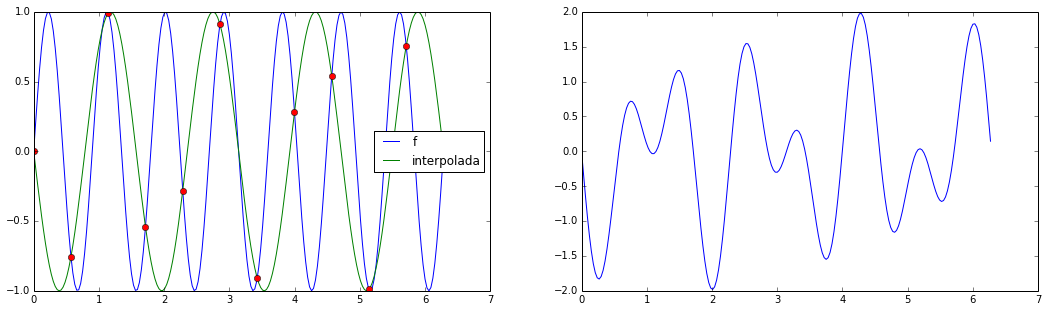

In [73]:
def f(x): return sin(7*x)

n = 11
h = 2*pi/n
x = arange(n)*h
y = f(x)

# Série interpoladora
c, int_f = fourier(y)

figsize(18,5)
subplot(1,2,1)
t = arange(0, 2*pi, 0.03)
plot(t, f(t), label='f')
plot(t, int_f(t), label='interpolada')
legend(loc=0);
plot(x, y, 'o', label='pontos')

subplot(1,2,2)
plot(t, int_f(t) - f(t));

Note que há um erro muito grande: não fomos capazes de recuperar uma função tão simples quanto $\sin(7x)$!

Por um lado, isso é bastante natural, pois permitimos apenas combinações de senos e cossenos com múltiplos até 5.
Por outro, observe que a função interpolada é igual a $-\sin(4x)$,
que pode ser exatamente representada na nossa base.
Isso ocorre porque as funções $-\sin(4x)$ e $\sin(7x)$ coincidem exatamente nos 11 pontos que escolhemos.

Neste caso, dizemos que $-\sin(4x)$ é um _alias_ ("nome alternativo") de $\sin(7x)$,
porque tanto faz qual seja.

Assim, se quisermos representar corretamente um fenômeno periódico, devemos usar pontos suficientes
para que as componentes relevantes não sejam vítimas de _aliasing_.
Isso é garantido se usarmos pelo menos o **dobro** de pontos com relação à freqüência $k$ correspondente.

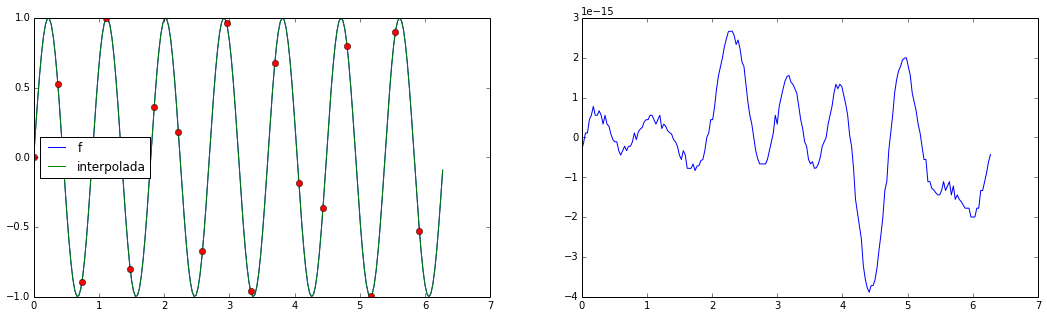

In [74]:
def f(x): return sin(7*x)

n = 17
h = 2*pi/n
x = arange(n)*h
y = f(x)

# Série interpoladora
c, int_f = fourier(y)

figsize(18,5)
subplot(1,2,1)
t = arange(0, 2*pi, 0.03)
plot(t, f(t), label='f')
plot(t, int_f(t), label='interpolada')
legend(loc=0);
plot(x, y, 'o', label='pontos')

subplot(1,2,2)
plot(t, int_f(t) - f(t));

### Exercício

Transforme somas em produtos e calcule as raízes de $\sin(7x) = -\sin(4x)$.
Generalize para descobrir todas as funções da forma $\sin(kx)$ que são representadas por $\sin(4x)$
usando os pontos $\frac{2j\pi}{11}$.

### Exercício

Represente algumas funções periódicas "curiosas" como a onda quadrada (que vale $1$ entre $0$ e $\pi$, e zero fora)
e a onda triangular (que sobe de $0$ até $\pi$ e depois desce de volta até zero).
Observe como o erro evolui quando se usam mais pontos para interpolar.